In [163]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from scipy.spatial.distance import cdist

In [164]:
np.random.seed(0)

count_per_clusters = 30
K = 3 # count clusters

X = shuffle(np.concatenate((
    -10 + 20 * 0 + 15 * np.random.rand(count_per_clusters, 2),
    -10 + 20 * 1 + 15 * np.random.rand(count_per_clusters, 2),
    -10 + 20 * 2 + 15 * np.random.rand(count_per_clusters, 2),
), axis=0))

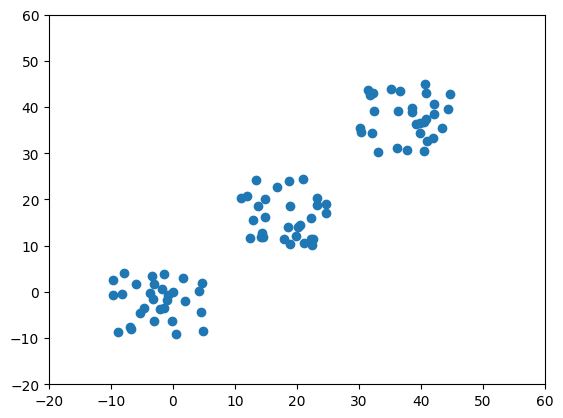

In [165]:
plt.scatter(X[:, 0], X[:, 1])
plt.axis([-20, 60, -20, 60]);

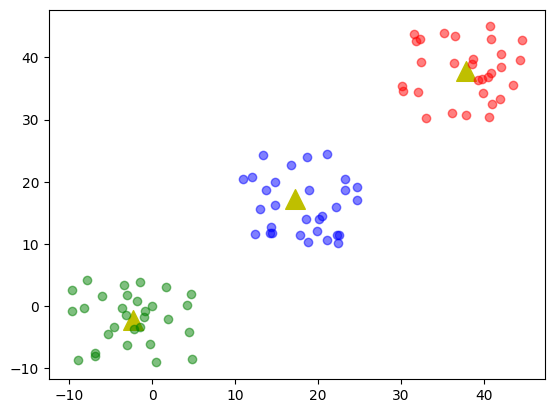

In [187]:
# Native code

centroids = np.array([X[0]])

for _ in range(1, K):
    lm = 0
    
    for x in X:
        mv = 1e9
        
        for c in centroids:
            t = np.sum((x - c) ** 2)
            if t < mv:
                mv = t
                mi = x
            
        if mv > lm:
            li = mi
            lm = mv
            
    centroids = np.append(centroids, [li], axis=0)
    
y = np.zeros(count_clusters * count_per_clusters, dtype=np.int8)
t = np.zeros((count_clusters, 2))
colors = {
    0: "r",
    1: "g",
    2: "b"
}

# K-Means
for _ in range(10):
    d = np.argmin(cdist(centroids, X), axis=0)
    for k in range(K):
        centroids[k] = np.mean(X[d == k, :]) 
    
plt.scatter(centroids[:, 0], centroids[:, 1], marker="^", c="y", s=200)

for k in range(K):
    plt.scatter(X[d == k, 0], X[d == k, 1], c=colors[k], alpha=0.5)

In [188]:
# Using Sklearn

from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score

model = KMeans(n_clusters=3, max_iter=10)
y_pred = model.fit_predict(X)

# Check if my model is as good as Sklearn's model
print(accuracy_score(y_pred, y))

print(centroids)
print(model.cluster_centers_)

0.3333333333333333
[[37.80014908 37.80014908]
 [-2.25380115 -2.25380115]
 [17.16055686 17.16055686]]
[[37.81949362 37.78080453]
 [-2.56942054 -1.93818176]
 [18.17276591 16.14834781]]
